In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
from google.colab import drive
drive.mount('/content/drive')
doc = '/content/drive/MyDrive/Colab Notebooks/ex2data1.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
with open(doc, 'r') as f:
  csvreader = csv.reader(f, delimiter=',')
  data = [row for row in csvreader]
  data = np.array(data, dtype=np.float32)

In [11]:
df = pd.DataFrame(data, columns=['Exam 1', 'Exam 2', 'Admitted'])

print("Data Shape:", data.shape)
print("\nFirst 5 Rows:")
print(df.head())
print("\nData Statistics:")
print(df.describe())
print("\nClass Distribution:")
print(df['Admitted'].value_counts())

Data Shape: (100, 3)

First 5 Rows:
      Exam 1     Exam 2  Admitted
0  34.623661  78.024696       0.0
1  30.286711  43.894997       0.0
2  35.847408  72.902199       0.0
3  60.182598  86.308556       1.0
4  79.032738  75.344376       1.0

Data Statistics:
           Exam 1      Exam 2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644272   66.222000    0.600000
std     19.458221   18.582785    0.492366
min     30.058823   30.603264    0.000000
25%     50.919512   48.179206    0.000000
50%     67.032990   67.682381    1.000000
75%     80.212526   79.360605    1.000000
max     99.827858   98.869438    1.000000

Class Distribution:
Admitted
1.0    60
0.0    40
Name: count, dtype: int64


In [12]:
# Split into X (features) and y (labels)
X = data[:, :2].T  # Shape: (2, m)
y = data[:, 2:].T  # Shape: (1, m)

# Create theta vector
theta = np.zeros((X.shape[0]+1, 1))

# Add row of ones to the top of X matrix (for bias term)
X = np.concatenate([np.ones([1, X.shape[1]]), X])

print("X Shape (before adding bias):", (2, data.shape[0]))
print("X Shape (after adding bias):", X.shape)
print("y Shape:", y.shape)
print("theta Shape:", theta.shape)

# Normalize features (skip first row as it's the bias term)
X_normalized = X.copy()
for i in range(1, X.shape[0]):
    X_normalized[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

print("\nNormalization completed!")

X Shape (before adding bias): (2, 100)
X Shape (after adding bias): (3, 100)
y Shape: (1, 100)
theta Shape: (3, 1)

Normalization completed!


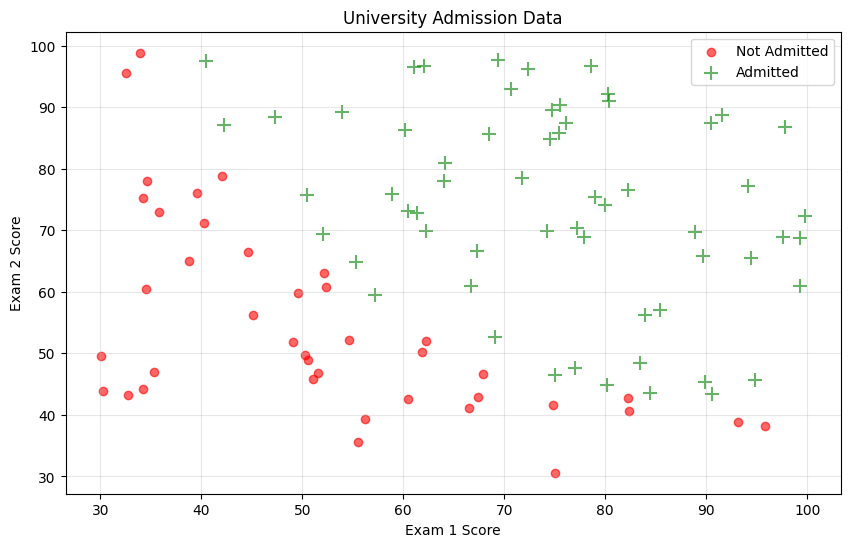

In [13]:
# Visualization using original data
admitted = df[df['Admitted'] == 1]
not_admitted = df[df['Admitted'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(not_admitted['Exam 1'], not_admitted['Exam 2'],
            c='red', marker='o', label='Not Admitted', alpha=0.6)
plt.scatter(admitted['Exam 1'], admitted['Exam 2'],
            c='green', marker='+', s=100, label='Admitted', alpha=0.6)
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('University Admission Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [15]:
def sigmoid(z):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-z))

# Test
z_test = np.array([-10, -5, 0, 5, 10])
print("Sigmoid test values:")
print(f"z = {z_test}")
print(f"sigmoid(z) = {sigmoid(z_test)}")

Sigmoid test values:
z = [-10  -5   0   5  10]
sigmoid(z) = [4.53978687e-05 6.69285092e-03 5.00000000e-01 9.93307149e-01
 9.99954602e-01]


In [16]:
def cost(theta, X, y):
    """
    Cost function for logistic regression

    Parameters:
    theta: parameter vector (n+1, 1)
    X: feature matrix (n+1, m)
    y: label vector (1, m)

    Returns:
    J: cost value
    """
    m = X.shape[1]  # number of examples

    # Hypothesis: h = sigmoid(theta^T * X)
    h = sigmoid(theta.T @ X)

    # Cost function
    # J = -1/m * sum(y*log(h) + (1-y)*log(1-h))
    epsilon = 1e-15  # to prevent log(0) error
    J = -1/m * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))

    return J

# Reset theta values and test
theta = np.zeros((X_normalized.shape[0], 1))
initial_cost = cost(theta, X_normalized, y)
print(f"\nInitial Cost Value: {initial_cost:.4f}")
print("(Expected value: ~0.69)")


Initial Cost Value: 0.6931
(Expected value: ~0.69)


In [17]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Gradient descent algorithm

    Parameters:
    X: feature matrix (n+1, m)
    y: label vector (1, m)
    theta: parameter vector (n+1, 1)
    alpha: learning rate
    iterations: number of iterations

    Returns:
    theta: optimized parameters
    cost_history: cost history
    """
    m = X.shape[1]
    cost_history = []

    for i in range(iterations):
        # Hypothesis
        h = sigmoid(theta.T @ X)

        # Compute gradient
        gradient = (1/m) * (X @ (h - y).T)

        # Update theta
        theta = theta - alpha * gradient

        # Compute cost
        cost_history.append(cost(theta, X, y))

        if i % 1000 == 0:
            print(f"Iteration {i}: Cost = {cost_history[-1]:.4f}")

    return theta, cost_history

# Run gradient descent
theta = np.zeros((X_normalized.shape[0], 1))
alpha = 0.01
iterations = 10000

theta_optimized, cost_history = gradient_descent(X_normalized, y, theta, alpha, iterations)

print(f"\nCost after optimization: {cost_history[-1]:.4f}")
print(f"Optimized theta:\n{theta_optimized}")


Iteration 0: Cost = 0.6916
Iteration 1000: Cost = 0.3117
Iteration 2000: Cost = 0.2624
Iteration 3000: Cost = 0.2424
Iteration 4000: Cost = 0.2314
Iteration 5000: Cost = 0.2245
Iteration 6000: Cost = 0.2198
Iteration 7000: Cost = 0.2164
Iteration 8000: Cost = 0.2139
Iteration 9000: Cost = 0.2120

Cost after optimization: 0.2105
Optimized theta:
[[1.27071369]
 [3.0473585 ]
 [2.81165927]]


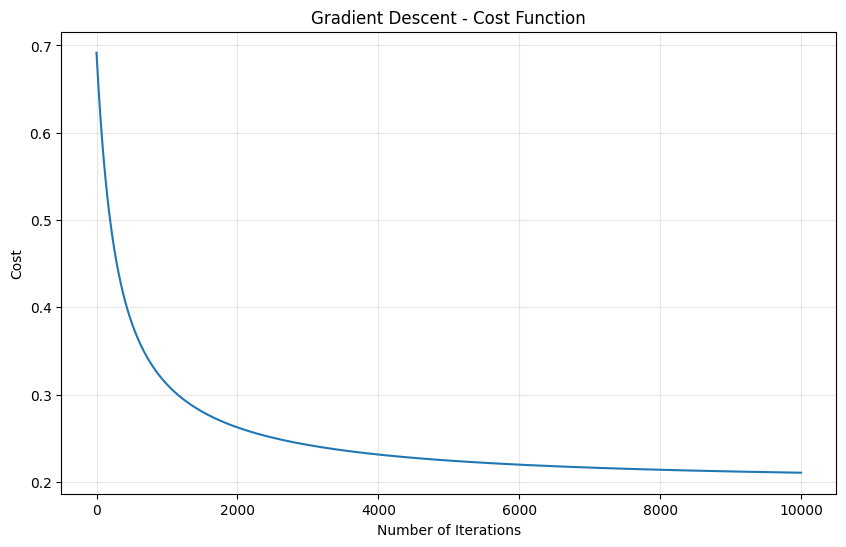

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent - Cost Function')
plt.grid(True, alpha=0.3)
plt.show()


In [19]:
def predict(theta, X):
    """
    Logistic regression prediction

    Parameters:
    theta: parameter vector
    X: feature matrix

    Returns:
    predictions: predicted classes (0 or 1)
    """
    h = sigmoid(theta.T @ X)
    predictions = (h >= 0.5).astype(int)
    return predictions

# Make predictions
predictions = predict(theta_optimized, X_normalized)
accuracy = np.mean(predictions == y) * 100
print(f"\nModel Accuracy: {accuracy:.2f}%")


Model Accuracy: 89.00%


In [20]:
print("\n" + "="*80)
print("MULTI-CLASS LOGISTIC REGRESSION - IRIS DATASET")
print("="*80 + "\n")

# Load Iris dataset
iris = datasets.load_iris()
X_iris = iris.data[:, :2]  # Only first 2 features
Y_iris = iris.target

print("Iris Dataset Information:")
print(f"X Shape: {X_iris.shape}")
print(f"Y Shape: {Y_iris.shape}")
print(f"Class Names: {iris.target_names}")
print(f"Feature Names: {iris.feature_names[:2]}")


MULTI-CLASS LOGISTIC REGRESSION - IRIS DATASET

Iris Dataset Information:
X Shape: (150, 2)
Y Shape: (150,)
Class Names: ['setosa' 'versicolor' 'virginica']
Feature Names: ['sepal length (cm)', 'sepal width (cm)']


In [21]:
# Create Logistic Regression model
# solver: optimization algorithm
# C: regularization parameter (smaller value = stronger regularization)
# multi_class: multi-class strategy
logreg = LogisticRegression(solver='lbfgs', C=1.0, multi_class='multinomial', max_iter=200)

# Train the model
logreg.fit(X_iris, Y_iris)

print("\nModel training completed!")
print(f"Model parameters: {logreg.coef_}")
print(f"Bias terms: {logreg.intercept_}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Model training completed!
Model parameters: [[-2.70858405  2.32402607]
 [ 0.61260073 -1.57100532]
 [ 2.09598332 -0.75302075]]
Bias terms: [ 7.91140003  1.84697777 -9.75837781]


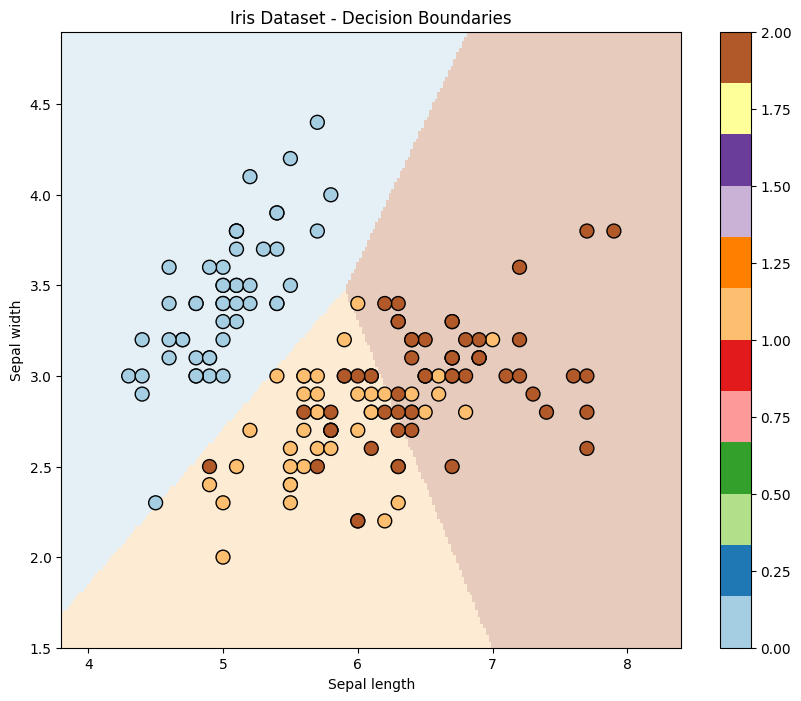

In [22]:
# Create mesh grid
x_min, x_max = X_iris[:, 0].min() - 0.5, X_iris[:, 0].max() + 0.5
y_min, y_max = X_iris[:, 1].min() - 0.5, X_iris[:, 1].max() + 0.5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict for each point
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualize
plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=Y_iris, edgecolors='k',
            cmap=plt.cm.Paired, s=100)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Iris Dataset - Decision Boundaries')
plt.colorbar()
plt.show()

In [23]:
# Probability predictions
probabilities = logreg.predict_proba(X_iris)

print("\nClass probabilities for first 10 examples:")
print("Example | Setosa | Versicolor | Virginica | True Class | Prediction")
print("-" * 70)
for i in range(10):
    pred = logreg.predict([X_iris[i]])[0]
    print(f"  {i+1:2d}    | {probabilities[i][0]:.3f}  |   {probabilities[i][1]:.3f}    |  {probabilities[i][2]:.3f}   |      {Y_iris[i]}       |     {pred}")



Class probabilities for first 10 examples:
Example | Setosa | Versicolor | Virginica | True Class | Prediction
----------------------------------------------------------------------
   1    | 0.923  |   0.059    |  0.018   |      0       |     0
   2    | 0.792  |   0.181    |  0.028   |      0       |     0
   3    | 0.942  |   0.051    |  0.007   |      0       |     0
   4    | 0.941  |   0.054    |  0.006   |      0       |     0
   5    | 0.962  |   0.030    |  0.009   |      0       |     0
   6    | 0.943  |   0.034    |  0.023   |      0       |     0
   7    | 0.980  |   0.017    |  0.002   |      0       |     0
   8    | 0.923  |   0.062    |  0.015   |      0       |     0
   9    | 0.936  |   0.060    |  0.004   |      0       |     0
  10    | 0.847  |   0.131    |  0.022   |      0       |     0



1. Accuracy: 0.8200 (82.00%)

2. Confusion Matrix:
[[50  0  0]
 [ 0 37 13]
 [ 0 14 36]]


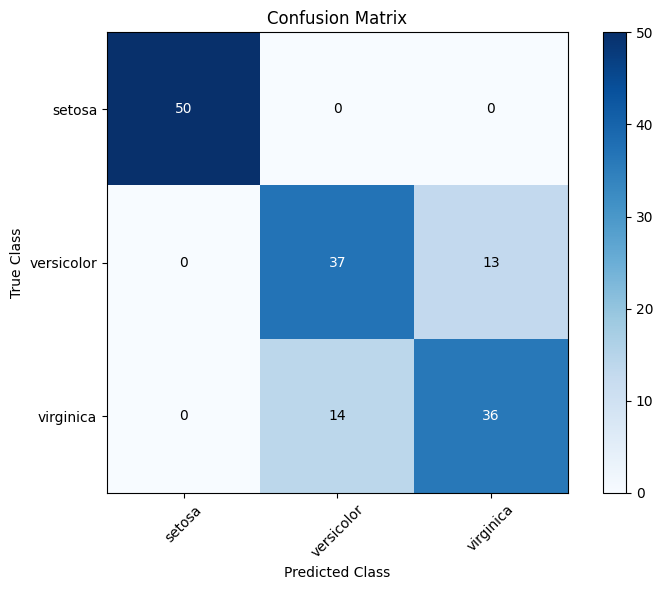


3. Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.73      0.74      0.73        50
   virginica       0.73      0.72      0.73        50

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150


4. Class-wise Accuracy:
   setosa: 1.0000 (100.00%)
   versicolor: 0.7400 (74.00%)
   virginica: 0.7200 (72.00%)

ALL ANALYSES COMPLETED!


In [24]:
# Predictions
y_pred_iris = logreg.predict(X_iris)

# Metric 1: Accuracy
accuracy = accuracy_score(Y_iris, y_pred_iris)
print(f"\n1. Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Metric 2: Confusion Matrix
cm = confusion_matrix(Y_iris, y_pred_iris)
print("\n2. Confusion Matrix:")
print(cm)

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)

# Write values in cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.tight_layout()
plt.show()

# Metric 3: Classification Report
print("\n3. Classification Report:")
print(classification_report(Y_iris, y_pred_iris, target_names=iris.target_names))

# Metric 4: Class-wise accuracy
print("\n4. Class-wise Accuracy:")
for i, class_name in enumerate(iris.target_names):
    class_mask = Y_iris == i
    class_accuracy = np.mean(y_pred_iris[class_mask] == Y_iris[class_mask])
    print(f"   {class_name}: {class_accuracy:.4f} ({class_accuracy*100:.2f}%)")

print("\n" + "="*80)
print("ALL ANALYSES COMPLETED!")
print("="*80)